In [7]:
!pip install opencv-python

   ---------------------------------------- 38.6/38.6 MB 1.2 MB/s eta 0:00:00


In [1]:
import cv2
import numpy as np

## creating an object that reads my webcam

In [6]:
cap = cv2.VideoCapture(0)  #1 is number of webcams

In [7]:
while True: # reading continuously
    ret,frame = cap.read()  #ret means whether reading is possible or not and frame takes pixes of webcam at that time stamp.
    cv2.imshow('frame',frame)
    if cv2.waitKey(1)==ord('t'):  # 't' is the key cv2 is waiting for, when we press t, it enters if statement
        break

cap.release()
cv2.destroyAllWindows() #my camera turns off

## We use hue saturation value (Hsv) instead of bgr(rgb)
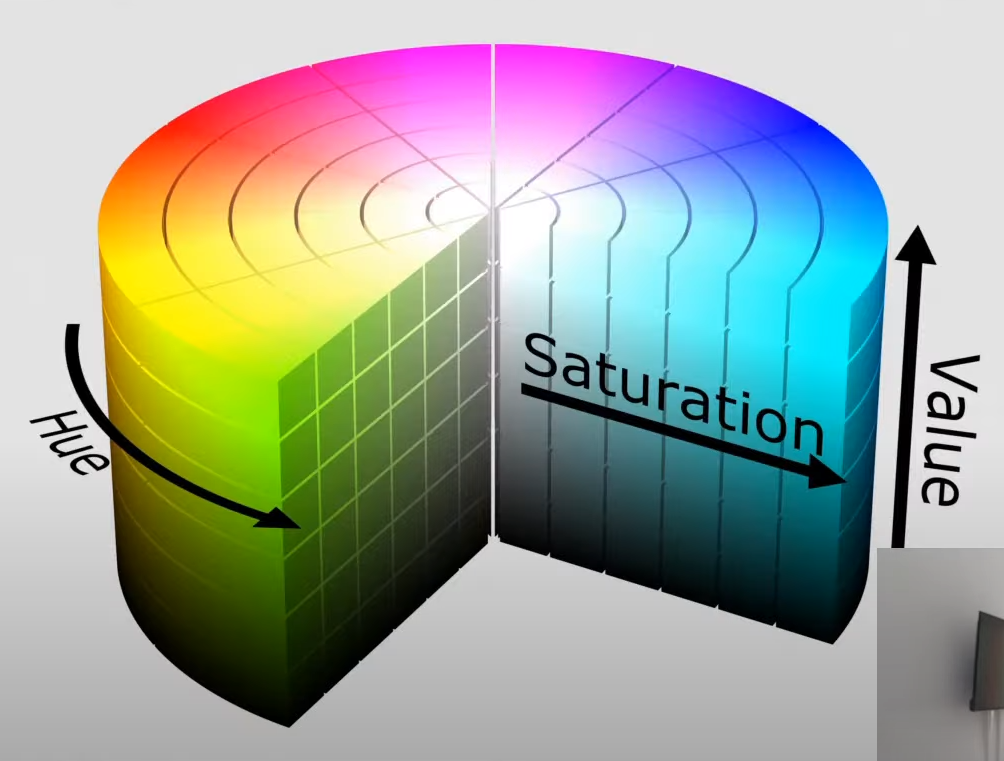
## hue - color, saturation- purity : white to colour , value-brightness:black to colour

## we try to find interval of yellow colour
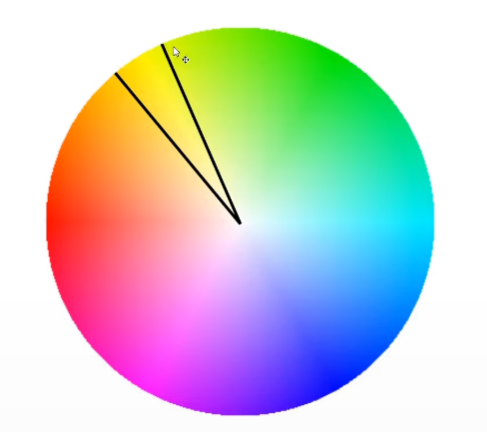

## Coversion to HSV

In [96]:
cap = cv2.VideoCapture(0)  #0 is number of webcams

## Defining a function that gives limits to mask when rgb values of colour are given

In [97]:
def limits(colour):
    c = np.uint8([[colour]])
    hsvc = cv2.cvtColor(c,cv2.COLOR_BGR2HSV)
    
    lower_limit = hsvc[0][0][0] -10,100,100
    upper_limit = hsvc[0][0][0] + 10,255,255

    lowerLimit = np.array(lower_limit,dtype=np.uint8)
    upperLimit = np.array(upper_limit,dtype=np.uint8)

    return lowerLimit,upperLimit

In [98]:
yellow = [0,255,0]

In [99]:
from PIL import Image

In [100]:
while True:
    ret,frame = cap.read()
    hsv_frame = cv2.cvtColor(frame,cv2.COLOR_BGR2HSV) #converting to HSV

    ll,ul = limits(yellow) # lower limits and upper limits.
    mask = cv2.inRange(hsv_frame,ll,ul) #a mask which only focuses on the colour which was given to it, in the form of limits

    mask_in_image_format = Image.fromarray(mask)
    boundary_box = mask_in_image_format.getbbox()
    

    if boundary_box!= None:
        x1,y1,x2,y2 = boundary_box
        # rectangle_added_frame
        frame = cv2.rectangle(frame,(x1,y1),(x2,y2),(0,255,0),5)   # making a rectangular box , giving in coordinates,colour and thickness of rectangle

    cv2.imshow('frame',mask)  #frame = image whe no yellow, frame=rectangular box+frame when there is yellow.

    if cv2.waitKey(1)==ord('t'):
        break

cap.release()
cv2.destroyAllWindows()

# ------------------------------------ Code Ends Here ------------------------------------

In [88]:
color=[0,255,0]
b = np.array([[color]])
print(b)

[[[  0 255   0]]]


In [89]:
type(b)

numpy.ndarray

In [90]:
a= cv2.cvtColor(b,cv2.COLOR_BGR2HSV)
print(a)

error: OpenCV(4.9.0) d:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.simd_helpers.hpp:94: error: (-2:Unspecified error) in function '__cdecl cv::impl::`anonymous-namespace'::CvtHelper<struct cv::impl::`anonymous namespace'::Set<3,4,-1>,struct cv::impl::A0x806cd31c::Set<3,-1,-1>,struct cv::impl::A0x806cd31c::Set<0,5,-1>,4>::CvtHelper(const class cv::_InputArray &,const class cv::_OutputArray &,int)'
> Unsupported depth of input image:
>     'VDepth::contains(depth)'
> where
>     'depth' is 4 (CV_32S)


In [103]:
ll

array([ 50, 100, 100], dtype=uint8)